# Bank Marketing

## Juan Fernando González
20170085

This is the Bank Marketing dataset wich I'm are going to explore and analize. 

With this Dataset, we will try to predict if the client will subscribe (yes/no) to a term deposit.

## Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets, preprocessing, metrics, tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.feature_selection import rfe
from sklearn.linear_model import LogisticRegression
import pydotplus
from IPython.display import Image  
from scipy.stats import normaltest, shapiro, anderson
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

c:\users\rmfer\desktop\ufm\semestre 7\machine learning models\venv_ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


## File Management

In [2]:
# File opening

filepath = r'dataset\\'
df = pd.read_csv(filepath + 'bank.csv')

## Dataframe Information

In [3]:
# First numbers of observations in dataset

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Last numbers of observations in dataset

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
# Shape of our dataset

print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (11162, 17)


In [6]:
# Find the total number of na values in dataframe

print("Total of na values in dataframe: ",df.isna().sum().sum())

Total of na values in dataframe:  0


In [7]:
# Types of the dataframe

print("------ Types ------")
df.dtypes

------ Types ------


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
# Columns of the dataframe

print('Dataframe Columns: ', df.columns)

Dataframe Columns:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [9]:
# Dataframe Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [10]:
# Show some statistics about dataset

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Attribute information

##### Bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical, 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. Housing: has housing loan? (categorical: 'no','yes','unknown')
7. Loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

##### Other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Cleaning Data

#### Removing irrelevant columns

In [11]:
# Removing Irrelevant columns 

df.drop(['contact'], axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

### Encoding and Normalization for categorical values

In [12]:
# Creating the instance of the library 

en  = preprocessing.LabelEncoder()

#### Job

In [13]:
df.job = en.fit_transform(df.job)

#### Marital status

In [14]:
df.marital = en.fit_transform(df.marital)

#### Education

In [15]:
df.education = en.fit_transform(df.education)

#### Default

In [16]:
df.default = en.fit_transform(df.default)

#### Housing

In [17]:
df.housing = en.fit_transform(df.housing)

#### Loan

In [18]:
df.loan = en.fit_transform(df.loan)

#### Poutcome

In [19]:
# Let's replace other for unknown, becouse it's almost the same.

df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')
df.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [20]:
df.poutcome = en.fit_transform(df.poutcome)

#### Deposit

In [21]:
df.deposit = en.fit_transform(df.deposit)

#### Duration

In [22]:
# Let's transform the durarion metric from seconds to minutes

for i in range(len(df.duration)):
    df.duration[i] = (df.duration[i]/60) 

#### Data after normalization and imputation

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,17,1,-1,0,2,1
1,56,0,1,1,0,45,0,0,24,1,-1,0,2,1
2,41,9,1,1,0,1270,1,0,23,1,-1,0,2,1
3,55,7,1,1,0,2476,1,0,9,1,-1,0,2,1
4,54,0,1,2,0,184,0,0,11,2,-1,0,2,1


In [24]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,4,1,-1,0,2,0
11158,39,7,1,1,0,733,0,0,1,4,-1,0,2,0
11159,32,9,2,1,0,29,0,0,2,2,-1,0,2,0
11160,43,9,1,1,0,0,0,1,0,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,10,1,-1,0,2,0


## Initial data visualization

### Boxplot for age

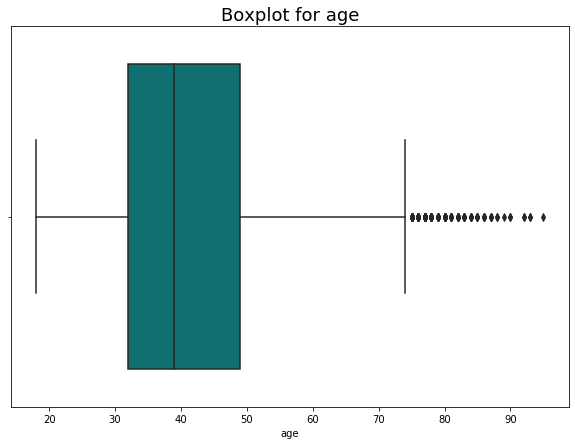

In [25]:
# Boxplot for age

f, ax = plt.subplots(figsize =(10,7)) 

ax = sns.boxplot(x=df.age, color='teal')

ax.set_title(label='Boxplot for age', fontsize=18);

### Age Histogram

Text(0, 0.5, 'Frequency')

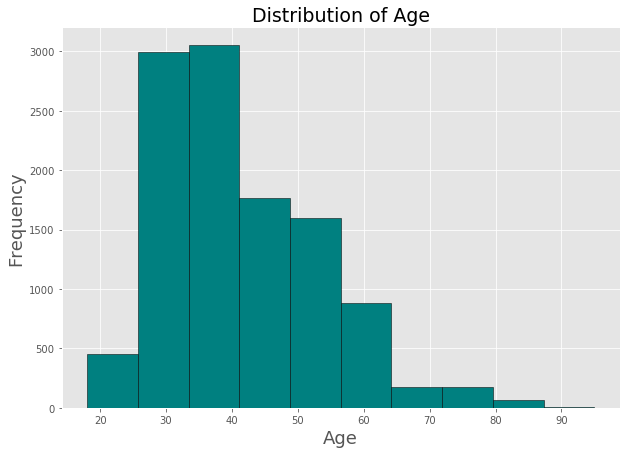

In [26]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Age
df.age.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Age', size=19)
plt.xlabel('Age', size=18)
plt.ylabel('Frequency', size=18)

In [27]:
# Let's see the values of age

df.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64

In [28]:
print("Mean of age: ", round(df.age.mean()))
print("Min age: ", df.age.min())
print("Max age: ", df.age.max())

Mean of age:  41.0
Min age:  18
Max age:  95


As we can see in the box plot and the histogram, the average of the clients that were contacted by the banks agency is between 34 and 41 years old. With the functions above, we can see that the real mean of the ages of this people is 41 years old, and the youngest person has 18 and the oldest person has 95, which is a very high age, so it could be interesting to see what was the choise of this person.

In [29]:
# Let's see the person that has 95 years old. 

df.loc[df.age == 95]

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
1582,95,5,0,0,0,2282,0,0,3,17,-1,0,2,1


### Normality Test for Age

#### Shapiro-Wilk test of normality

In [30]:
# Normality test

stat, p = shapiro(df.age)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.947, p=0.000
Sample does not look Gaussian (reject H0)


#### D’Agostino’s $K^2$ test of normality

In [31]:
# Normality test

stat, p = normaltest(df.age)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1160.912, p=0.000
Sample does not look Gaussian (reject H0)


#### Anderson-Darling test of normality

In [32]:
# Normality test

result = anderson(df.age)
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    
    sl, cv = result.significance_level[i], result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('Alpha = %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 160.431
Alpha = 15.000: 0.576, data does not look normal (reject H0)
Alpha = 10.000: 0.656, data does not look normal (reject H0)
Alpha = 5.000: 0.787, data does not look normal (reject H0)
Alpha = 2.500: 0.918, data does not look normal (reject H0)
Alpha = 1.000: 1.092, data does not look normal (reject H0)


### Deposit Histogram

Text(0, 0.5, 'Frequency')

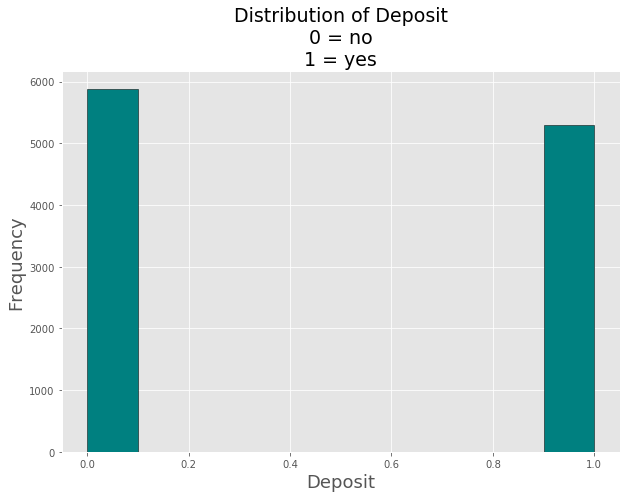

In [33]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Job
df.deposit.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7), label="sine")
plt.title('Distribution of Deposit\n0 = no\n1 = yes', size=19)
plt.xlabel('Deposit', size=18)
plt.ylabel('Frequency', size=18)

In [34]:
# Let's see the values of age

df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [35]:
ceros = (5873/len(df.deposit))*100
unos = (5289/len(df.deposit))*100

print('No deposit: ', ceros)
print('No deposit: ', unos)

No deposit:  52.61601863465329
No deposit:  47.38398136534671


As we can see, there are more people that said no to term deposit.

### Deposit Histogram

Text(0, 0.5, 'Frequency')

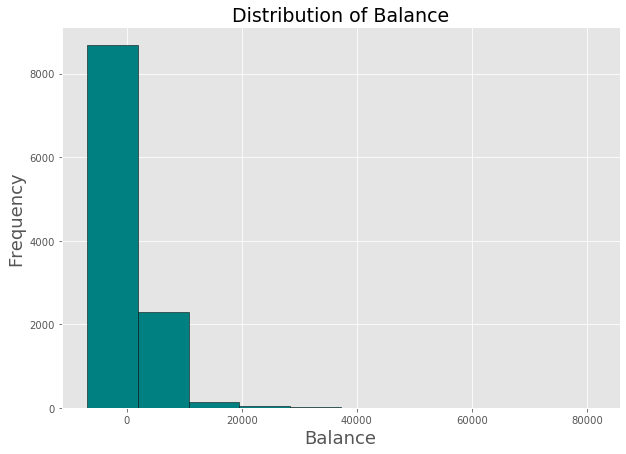

In [36]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Job
df.balance.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7), label="sine")
plt.title('Distribution of Balance', size=19)
plt.xlabel('Balance', size=18)
plt.ylabel('Frequency', size=18)

In [37]:
# Let's see the values of age

df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

### Scatterplot for balance and age

Text(0, 0.5, 'Balance')

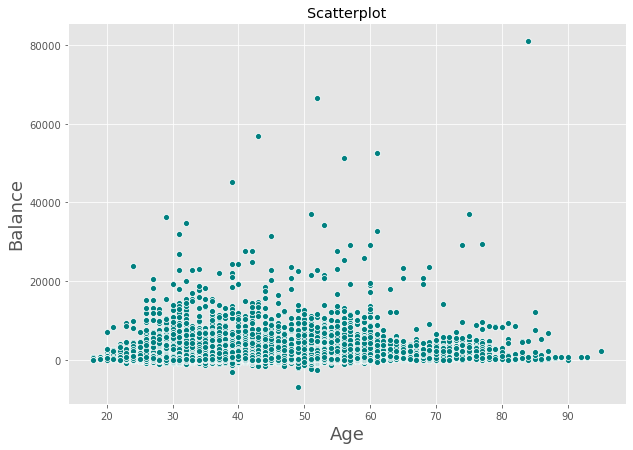

In [38]:
f, ax = plt.subplots(figsize =(10,7))
sns.scatterplot(x=df.age.values, y=df.balance.values, color='teal')
ax.set(title='Scatterplot')
plt.xlabel('Age', size=18)
plt.ylabel('Balance', size=18)

Across all ages, majority of people have savings of less than 20000.

## Corrlation

[Text(0.5, 1, 'Correlation')]

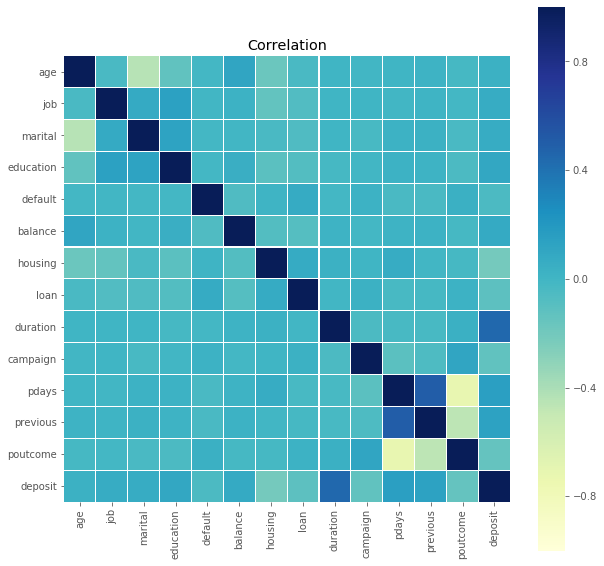

In [39]:
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, square=True, vmin=-1, vmax=1)
ax.set(title='Correlation')

In the correlation map we can see that Deposit is highly correlated with duration, and also, it appears to have a relationship with previous and poutcome. So those features could be our candidates to be independent variables.

## Initial exploration

### Decision Trees

#### Functions

##### Plot Tree Function

In [40]:
def plot_tree(tree,f_n=None, c_n=None):
    """ Plot root, nodes and leaves of a tree
    Args: 
        - Tree: Tree to plot
        - f_n (list): Feature names
        - c_n (list): Class names
    Returns:
        Plot of tree
    """
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=f_n,class_names=c_n,proportion=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

##### Plot ROC Function

In [41]:
def plot_roc(y, y_pred):
    """ Plot ROC curve
    Args:
        - y (array): Target values
        - y_pred (array): Predicted values
    Returns:
        ROC plot
    """
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    f,ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr, tpr, color='lightgreen',lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
    ax.plot([0, 1], [0, 1], color='k', lw=1, linestyle='--', label='Random classifier')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic Curve',fontsize=14)
    ax.legend()
    plt.show()

##### Root Mean Squares Error

In [42]:
def mse(y, y_pred):
    """ Compute Root Mean Squares Error
    """
    m = len(y)
    error = 0
    for i in range(m):
        error += (y[i] - y_pred[i]) ** 2
        
    return error/m

#### Input selection

##### X's for feature importance

In [43]:
names = ['previous', 'duration', 'job', 'marital', 'pdays', 'education', 'balance']
x_multi = df[names]

x_multi.head()

,previous,duration,job,marital,pdays,education,balance
0,0,17,0,1,-1,1,2343
1,0,24,0,1,-1,1,45
2,0,23,9,1,-1,1,1270
3,0,9,7,1,-1,1,2476
4,0,11,0,1,-1,2,184


##### Y - Dependent Variable

In [44]:
y = df.deposit

#### Feature importance

In [45]:
estimator = LogisticRegression(max_iter=500)
selector = rfe.RFE(estimator, n_features_to_select=4, step=1)
selector.fit(x_multi, y)

print(selector.ranking_)
selector.support_

[1 1 2 1 3 1 4]


array([ True,  True, False,  True, False,  True, False])

##### X's given Feature importance

In [46]:
names = ['previous', 'duration', 'marital', 'education']
x_multi = df[names]

x_multi.head()

,previous,duration,marital,education
0,0,17,1,1
1,0,24,1,1
2,0,23,1,1
3,0,9,1,1
4,0,11,1,2


##### Preparing data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_multi, y, test_size=0.20, random_state=40)

In [48]:
names_ = ['previous', 'Call duration', 'marital', 'education']

In [49]:
feature_names = names_
target_names = np.array(['yes', 'no'])

#### Classification Tree

#### Gini criterion

##### 3 depth

In [50]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=43)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

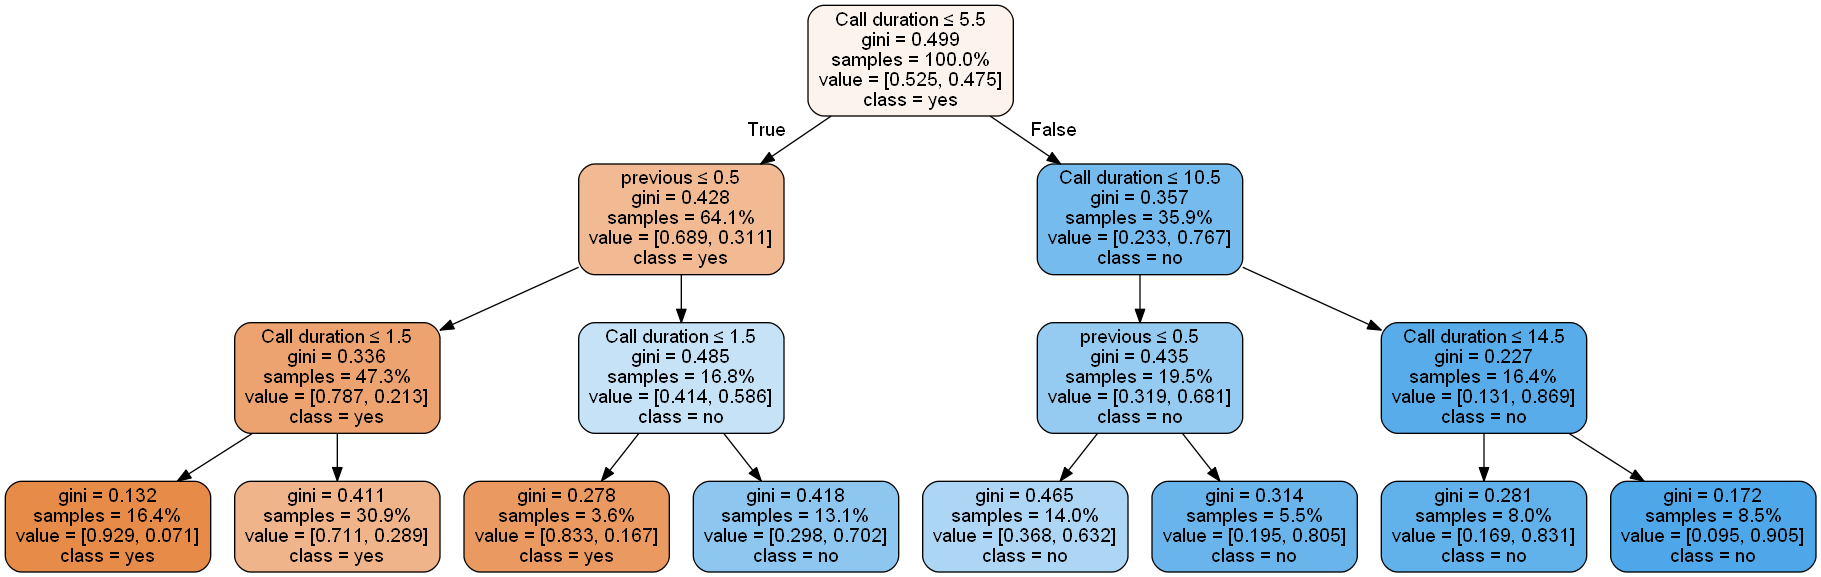

In [51]:
# visualize tree

plot_tree(tree1,feature_names, target_names)

In [52]:
t1_score_train = tree1.score(X_train, y_train)
print("Training score: ",t1_score_train)
t1_score_test = tree1.score(X_test, y_test)
print("Testing score: ",t1_score_test)

Training score:  0.770187031022511
Testing score:  0.7657859381997313


##### 4 depth

In [53]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=43)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

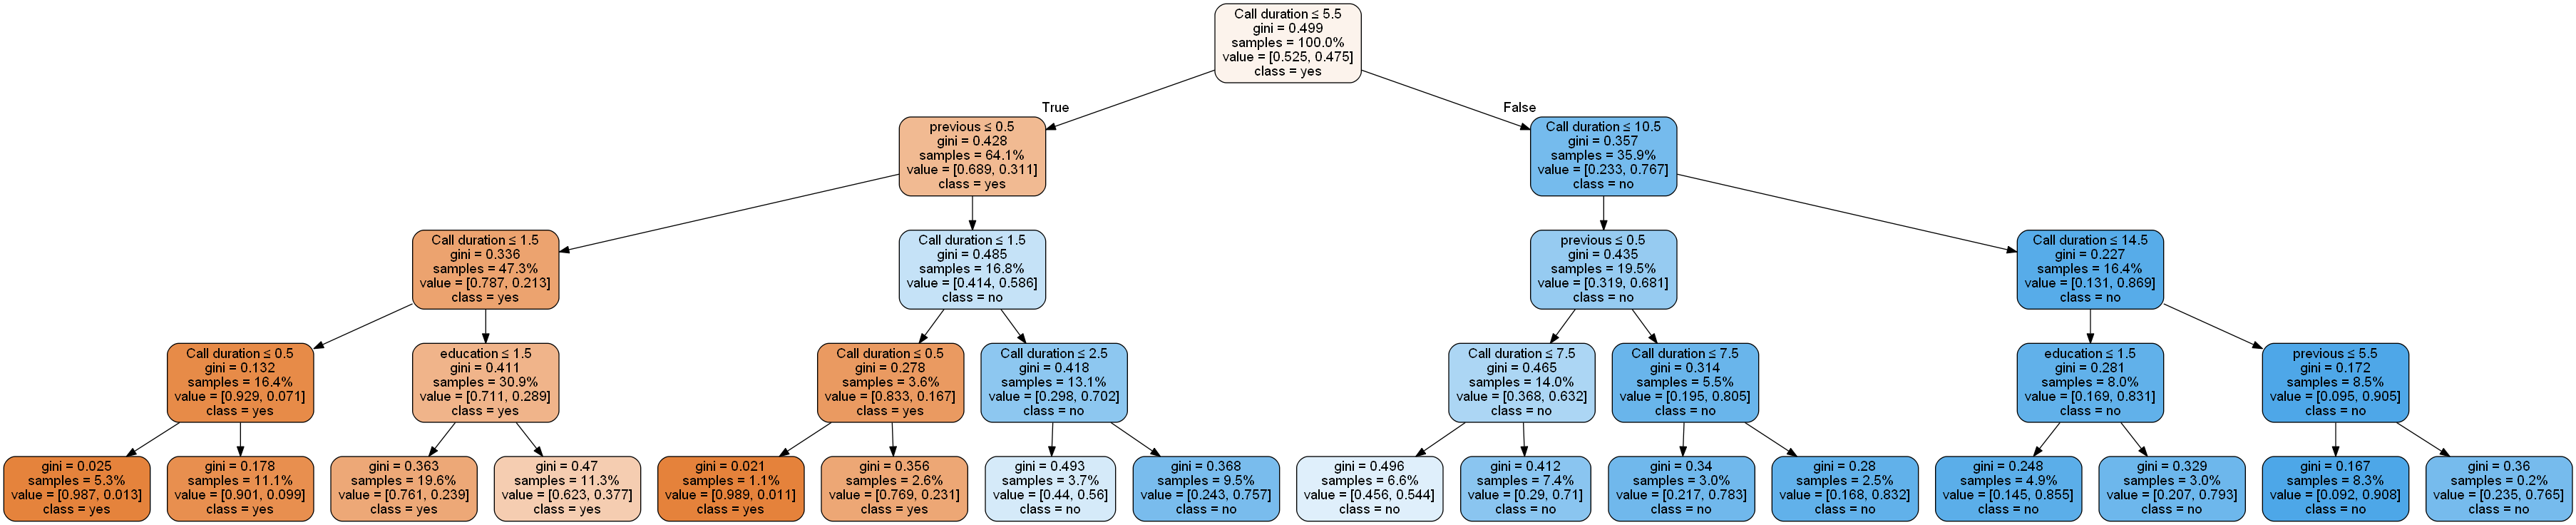

In [54]:
# visualize tree

plot_tree(tree2,feature_names, target_names)

In [55]:
t2_score_train = tree2.score(X_train, y_train)
print("Training score: ",t2_score_train)
t2_score_test = tree2.score(X_test, y_test)
print("Testing score: ",t2_score_test)

Training score:  0.770187031022511
Testing score:  0.7657859381997313


##### 6 depth

In [56]:
tree3 = DecisionTreeClassifier(max_depth=6, random_state=43)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

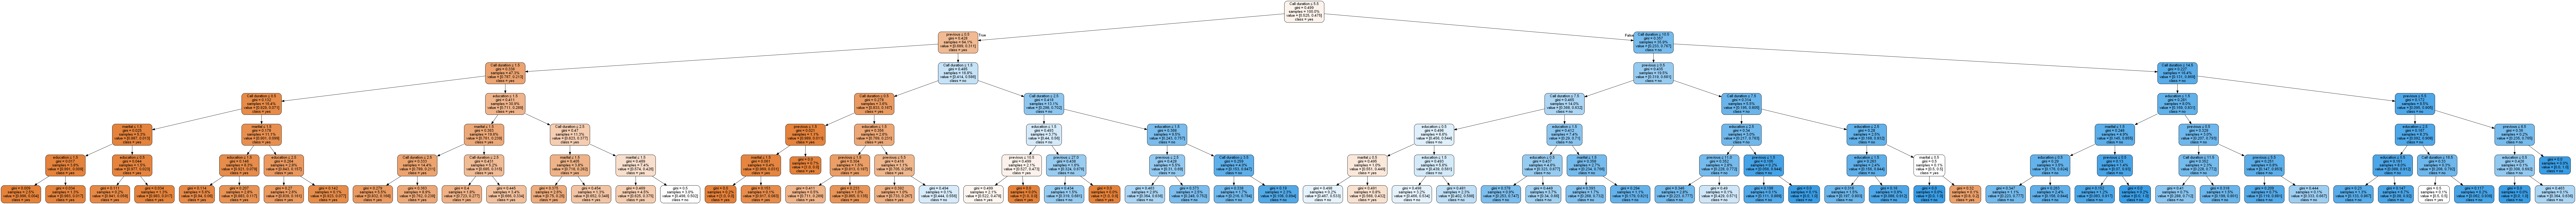

In [57]:
# visualize tree

plot_tree(tree3,feature_names, target_names)

In [58]:
t3_score_train = tree3.score(X_train, y_train)
print("Training score: ",t3_score_train)
t3_score_test = tree3.score(X_test, y_test)
print("Testing score: ",t3_score_test)

Training score:  0.7730988912532198
Testing score:  0.768025078369906


##### No max depth

In [59]:
tree_n = DecisionTreeClassifier(random_state=43)
tree_n.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [60]:
tree_n_score_train = tree_n.score(X_train, y_train)
print("Training score: ",tree_n_score_train)
tree_n_score_test = tree_n.score(X_test, y_test)
print("Testing score: ",tree_n_score_test)

Training score:  0.7904580580132153
Testing score:  0.7510076130765786


#### Entropy criterion

In [61]:
tree4 = DecisionTreeClassifier(max_depth=6, criterion='entropy',random_state=42)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
t4_score_train = tree4.score(X_train, y_train)
print("Training score: ",t4_score_train)
t4_score_test = tree4.score(X_test, y_test)
print("Testing score: ",t4_score_test)

Training score:  0.7722029342591555
Testing score:  0.7666815942678011


In [63]:
y_pred = tree4.predict(X_test)

#### ROC Curve

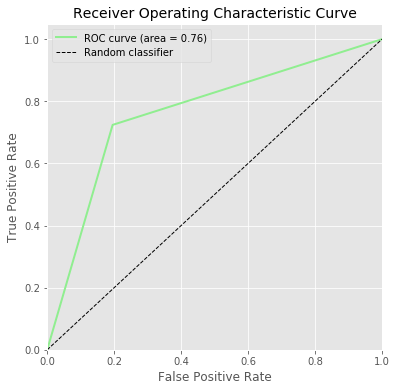

In [64]:
plot_roc(y_test,y_pred)

### Bagging 

In [65]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True, # Bagging or Pasting
                            max_samples=50,
                            oob_score = False,
                            n_jobs=-1)

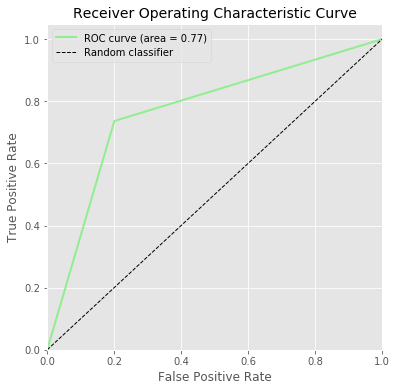

In [66]:
bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)
plot_roc(y_test, y_pred)

### Random Forest

In [67]:
rand_forest = RandomForestClassifier(max_leaf_nodes=3,
                                     bootstrap=True,
                                     max_samples=50,
                                     random_state=42,
                                     n_estimators=50,
                                     n_jobs=-1)

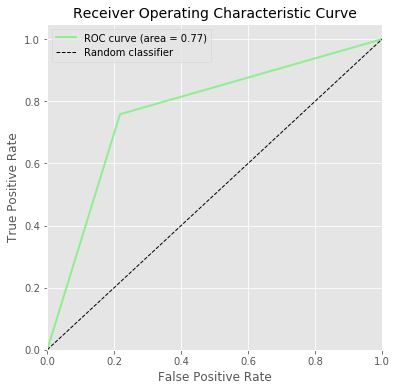

In [68]:
# train the classifier
rand_forest.fit(X_train, y_train)
# predict
y_pred = rand_forest.predict(X_test)
# plot ROC
plot_roc(y_test, y_pred)

### AdaBoost Regression

In [69]:
# Define model parameters
adaboost_reg = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='linear')

In [70]:
# Train the model
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=500, random_state=None)

In [71]:
# Get training and test predictions

prediction_train = adaboost_reg.score(X_train, y_train)
prediction_test = adaboost_reg.score(X_test, y_test)

print(prediction_train)
print(prediction_test)

0.3202390213264322
0.31821996539415154


## Adaboost Classification

In [72]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(x_multi, y, test_size=0.20, random_state=42)

In [73]:
# Define and train classifier model
AdaBoost = AdaBoostClassifier(n_estimators=500, learning_rate=1, algorithm='SAMME')
AdaBoost.fit(X_train,y_train)
c_pred_train = AdaBoost.score(X_train,y_train)
c_pred_test = AdaBoost.score(X_test,y_test)

In [74]:
# Get train and test accuracy
print("Training score: ",c_pred_train)
print("Testing score: ",c_pred_test)

Training score:  0.7710829880165752
Testing score:  0.768025078369906


## Conclusion

After the process of exploring and analyzing the data already mentioned, I can conclude and answer the question in the introduction. Commercial banks will be more likely to have customers sign up for time deposits the shorter the call, or that the calls were brief and the customer was contacted at least more than once. However, given that the algorithm scores were not the best, I also concluded that there could have been more significant variables not added to the dataset that would possibly give us a better idea and visualization of what really affects the customer's decision, i.e., such as the interest rate offered, the time of the call, or the length of the term offered. And finally, I also noted that one of the variables selected may have affected our analysis and predictions, such as the length of the call, because although most customers who accepted the term deposit were called briefly, there were people who accepted the term deposit with a much longer call duration, and this gives us the indication that the client may have already been aware of the campaign about the deposit, and that this is why the call was not so extensive, and that there are clients who were also interested, but who perhaps needed more information or could even have been negotiating, as I mentioned before, a preferential rate, terms, etc. 